# Prétraitement de donnée

### Importation des librairies

In [100]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [101]:
pd.options.display.float_format = "{:.2f}".format

### 1 - Chargez le fichier ```dataset.csv```

In [102]:
#Pensez à changer dataset.csv par le nom de votre jeu de données
df = pd.read_csv("dataset.csv")
df

,City,Age,Salary,Maried
0,Paris,NaN,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,NaN,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,NaN,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,NaN,No
9,New York,37.00,67000.00,Yes


### 2 - Remplacez les données manquantes par la moyenne de la caractéristique pour la colonne Age : Cette technique est la meilleure façon à ce jour de traiter les valeurs manquantes. De nombreux statisticiens utilisent cette technique.

In [103]:
#Complétez le code ci-dessous
df.Age = df.Age.fillna(df['Age'].mean())
df

,City,Age,Salary,Maried
0,Paris,35.38,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,NaN,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,35.38,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,NaN,No
9,New York,37.00,67000.00,Yes


### 3 - Remplacez les données manquantes de la colonne Salary par la mediane de la caractéritique

In [104]:
#Complétez le code ci-dessous
df.Salary = df.Salary.fillna(df['Salary'].mean())
df

,City,Age,Salary,Maried
0,Paris,35.38,72000.00,No
1,New York,27.00,48000.00,Yes
2,Berlin,50.00,54000.00,No
3,Munich,38.00,61000.00,No
4,Madrid,40.00,61375.00,Yes
5,Paris,35.00,58000.00,Yes
6,Toulouse,35.38,52000.00,No
7,Berlin,21.00,79000.00,Yes
8,Paris,35.00,61375.00,No
9,New York,37.00,67000.00,Yes


### 4 - Encodez la colonne City en utilisant les nombres entiers 0, 1 et 2. 

In [105]:
#Complétez le code ci-dessous
df.City=df.City.astype('category').cat.codes
df

,City,Age,Salary,Maried
0,4,35.38,72000.00,No
1,3,27.00,48000.00,Yes
2,0,50.00,54000.00,No
3,2,38.00,61000.00,No
4,1,40.00,61375.00,Yes
5,4,35.00,58000.00,Yes
6,5,35.38,52000.00,No
7,0,21.00,79000.00,Yes
8,4,35.00,61375.00,No
9,3,37.00,67000.00,Yes


### 5 - Faites de même pour la colonne Maried

In [106]:
df.Maried = df.Maried.astype('category').cat.codes
df

,City,Age,Salary,Maried
0,4,35.38,72000.00,0
1,3,27.00,48000.00,1
2,0,50.00,54000.00,0
3,2,38.00,61000.00,0
4,1,40.00,61375.00,1
5,4,35.00,58000.00,1
6,5,35.38,52000.00,0
7,0,21.00,79000.00,1
8,4,35.00,61375.00,0
9,3,37.00,67000.00,1


Dans l'apprentissage automatique, nous divisons les données en deux parties :

L'ensemble d'apprentissage : La partie des données sur laquelle nous mettons en œuvre notre modèle d'apprentissage automatique. Ensemble de test : La partie des données sur laquelle nous évaluons les performances de notre modèle d'apprentissage automatique. La raison pour laquelle nous divisons ces données est de nous assurer que notre modèle d'apprentissage automatique ne surapprend pas la corrélation des données sur lesquelles il est formé. Si nous le laissons trop apprendre sur les données, ses performances risquent d'être médiocres lorsqu'il est testé sur un nouvel ensemble de données avec une corrélation différente.

Par conséquent, lorsque nous construisons un modèle d'apprentissage automatique, l'idée est de le mettre en œuvre sur l'ensemble d'apprentissage et de l'évaluer sur l'ensemble de test. Nous nous attendons à ce que les performances de l'ensemble d'apprentissage et de l'ensemble de test soient différentes et, si c'est le cas, le modèle peut s'adapter à de nouveaux ensembles de données.

### 6 - Divisez l'ensemble de données en ensembles de formation et de test.

In [107]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df.Maried)
#stratify : elle permet de garantir que la distribution de la variable Maried
# reste cohérente entre les deux ensembles de training et de test.

In [108]:
training_set

,City,Age,Salary,Maried
7,0,21.00,79000.00,1
8,4,35.00,61375.00,0
2,0,50.00,54000.00,0
0,4,35.38,72000.00,0
4,1,40.00,61375.00,1
1,3,27.00,48000.00,1
5,4,35.00,58000.00,1
3,2,38.00,61000.00,0


In [109]:
test_set

,City,Age,Salary,Maried
6,5,35.38,52000.00,0
9,3,37.00,67000.00,1


### 7 - Mettez à l'échelle séparément l'ensemble d'entraînement et l'ensemble de test de notre jeu de données.

In [110]:
X_train = training_set.drop('Maried', axis=1)
y_train = training_set['Maried']

X_test = test_set.drop('Maried', axis=1)
y_test = test_set['Maried']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# on apprend les paramètres UNIQUEMENT sur le train
X_train_scaled = scaler.fit_transform(X_train)

# on applique les mêmes paramètres au test
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_train_scaled_df

,City,Age,Salary
7,-1.37,-1.76,1.88
8,1.07,-0.02,-0.05
2,-1.37,1.84,-0.86
0,1.07,0.03,1.11
4,-0.76,0.60,-0.05
1,0.46,-1.01,-1.52
5,1.07,-0.02,-0.42
3,-0.15,0.35,-0.09


In [111]:
# ou avec cette methode qui est mieux pour le test
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

training_set[["Age", "Salary"]] = sc.fit_transform(training_set[["Age", "Salary"]])
training_set

,City,Age,Salary,Maried
7,0,-1.76,1.88,1
8,4,-0.02,-0.05,0
2,0,1.84,-0.86,0
0,4,0.03,1.11,0
4,1,0.60,-0.05,1
1,3,-1.01,-1.52,1
5,4,-0.02,-0.42,1
3,2,0.35,-0.09,0


In [112]:
test_set.iloc[:,1:-1] = test_set.iloc[:,1:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
test_set

,City,Age,Salary,Maried
6,5,-0.71,-0.71,0
9,3,0.71,0.71,1


In [113]:

test_set[["Age", "Salary"]] = sc.transform(test_set[["Age", "Salary"]])
test_set

,City,Age,Salary,Maried
6,5,-4.45,-6.78,0
9,3,-4.28,-6.77,1


### Afficher un graphique

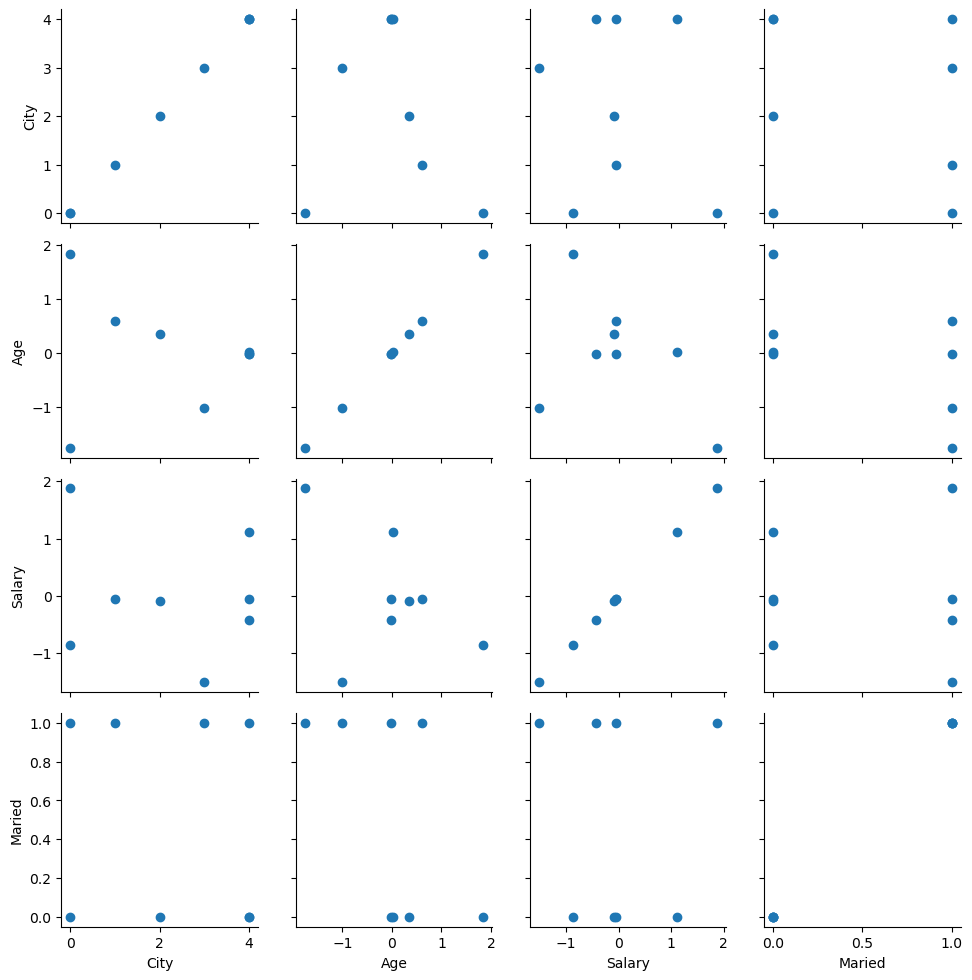

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Créer un PairGrid pour visualiser les relations entre les variables
g = sns.PairGrid(training_set)
g.map(plt.scatter)  # Scatter plots
plt.show()

# Régression linéaire simple

### 1. Nous allons utiliser le jeu de données Tips

In [115]:
import pandas as pd
import numpy as np

Tips = pd.read_csv("tips.csv")

### 2 - Afficher la taille du dataframe

In [116]:
Tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 3 - Divisez l'ensemble de données en sous-ensembles de formation et de test en utilisant seulement deux variables : tip et total_bill.

In [117]:
#Train
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(Tips[["total_bill", "tip"]], test_size=0.2, random_state=42)
training_set

,total_bill,tip
228,13.28,2.72
208,24.27,2.03
96,27.28,4.00
167,31.71,4.50
84,15.98,2.03
...,...,...
106,20.49,4.06
14,14.83,3.02
92,5.75,1.00
179,34.63,3.55


In [118]:
#Test
test_set

,total_bill,tip
24,19.82,3.18
6,8.77,2.00
153,24.55,2.00
211,25.89,5.16
198,13.00,2.00
176,17.89,2.00
192,28.44,2.56
124,12.48,2.52
9,14.78,3.23
101,15.38,3.00


### 4 - Vérifier la linéarité entre les caractéristiques "total_bill" et "tip".

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

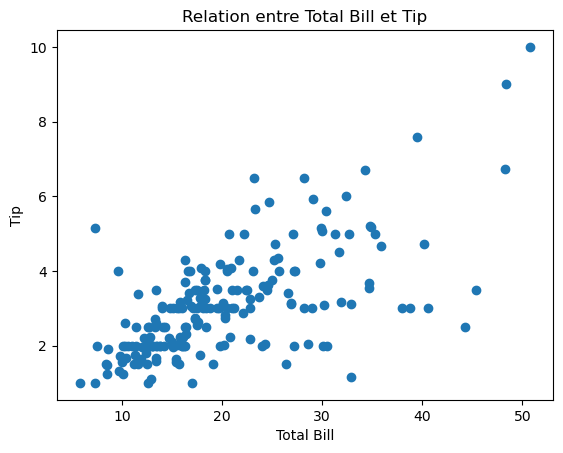

In [120]:
# Vérifier la linéarité avec un scatter plot
plt.scatter(training_set["total_bill"], training_set["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Relation entre Total Bill et Tip")
plt.show()

### 5 - D'après le graphique, nous voyons que la relation est à peu près linéaire. Essayez une transformation de notre variable explicative total_bill en utilisant la fonction logarithmique.

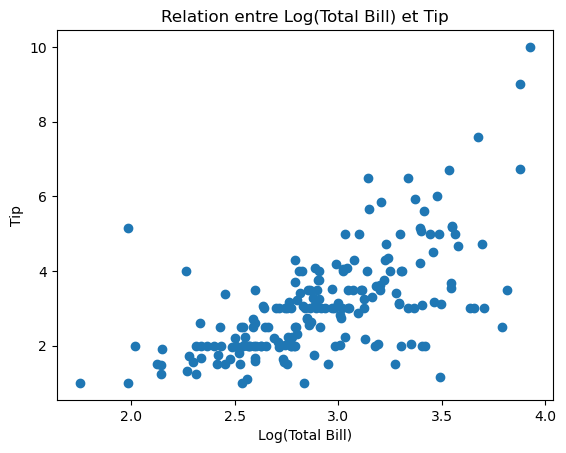

In [127]:
# Appliquer la transformation logarithmique à total_bill
plt.scatter(np.log(training_set["total_bill"]), training_set["tip"])
plt.xlabel("Log(Total Bill)")
plt.ylabel("Tip")
plt.title("Relation entre Log(Total Bill) et Tip")
plt.show()

# Conclusion : La transformation logarithmique peut aider à linéariser la relation
# et à améliorer les prédictions du modèle de régression linéaire

### 6 - Exécutez le modèle de régression linéaire en utilisant la transformation logarithmique.

In [122]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(np.log(training_set["total_bill"]).values.reshape(-1,1), training_set["tip"])

print(f"Coefficient : {reg.coef_}")
print(f"Intercept : {reg.intercept_}")

Coefficient : [2.16543672]
Intercept : -3.2335550531563975


### 7 - Tracez le modèle de régression obtenu.

In [123]:
#votre code ici

### 8 - Faites la prédiction sur le test set et calculer la MSE

In [124]:
from sklearn.metrics import mean_squared_error
#Completez le code ici


### Linear Regression uning statmodels

In [125]:
import statsmodels.api as sm
#add constant to predictor variables
x = sm.add_constant(np.log(training_set["total_bill"]))
#fit linear regression model
#completez le code ici

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           2.54e-23
Time:                        13:05:18   Log-Likelihood:                -295.68
No. Observations:                 195   AIC:                             595.4
Df Residuals:                     193   BIC:                             601.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2336      0.561     -5.768      0.0

# Régression linéaire multiple

Le jeu de données Auto MPG

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.00,4,140.00,86.00,2790.00,15.60,82,1
394,44.00,4,97.00,52.00,2130.00,24.60,82,2
395,32.00,4,135.00,84.00,2295.00,11.60,82,1
396,28.00,4,120.00,79.00,2625.00,18.60,82,1
397,31.00,4,119.00,82.00,2720.00,19.40,82,1


## Nettoyer les données

### 1 - liister les données ayant des valeurs manquants

In [ ]:
#votre code ici

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### 2 - Supprimez les lignes contenant des NAN

In [ ]:
#votre code ici

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

### 3 - Encodez la colonne Origine en utilisant les nombres entiers 1: USA, 2: Europe et 3: Japan. 

In [ ]:
#votre code ici

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.00,8,307.00,130.00,3504.00,12.00,70,USA
1,15.00,8,350.00,165.00,3693.00,11.50,70,USA
2,18.00,8,318.00,150.00,3436.00,11.00,70,USA
3,16.00,8,304.00,150.00,3433.00,12.00,70,USA
4,17.00,8,302.00,140.00,3449.00,10.50,70,USA
...,...,...,...,...,...,...,...,...
393,27.00,4,140.00,86.00,2790.00,15.60,82,USA
394,44.00,4,97.00,52.00,2130.00,24.60,82,Europe
395,32.00,4,135.00,84.00,2295.00,11.60,82,USA
396,28.00,4,120.00,79.00,2625.00,18.60,82,USA


### 4 - Encoder (hot encoding) les valeurs de la colonne Origine avec ```.get_dummies```.

In [ ]:
dataset = pd.get_dummies(dataset, columns = ['Origin'])
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
0,18.00,8,307.00,130.00,3504.00,12.00,70,0,0,1
1,15.00,8,350.00,165.00,3693.00,11.50,70,0,0,1
2,18.00,8,318.00,150.00,3436.00,11.00,70,0,0,1
3,16.00,8,304.00,150.00,3433.00,12.00,70,0,0,1
4,17.00,8,302.00,140.00,3449.00,10.50,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.00,4,140.00,86.00,2790.00,15.60,82,0,0,1
394,44.00,4,97.00,52.00,2130.00,24.60,82,1,0,0
395,32.00,4,135.00,84.00,2295.00,11.60,82,0,0,1
396,28.00,4,120.00,79.00,2625.00,18.60,82,0,0,1


### 5 - Diviser les données en ensembles d'apprentissage et de test

In [ ]:
#train set

#votre code ici

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
260,18.60,6,225.00,110.00,3620.00,18.70,78,0,0,1
184,25.00,4,140.00,92.00,2572.00,14.90,76,0,0,1
174,18.00,6,171.00,97.00,2984.00,14.50,75,0,0,1
64,15.00,8,318.00,150.00,4135.00,13.50,72,0,0,1
344,39.00,4,86.00,64.00,1875.00,16.40,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,15.00,8,304.00,150.00,3892.00,12.50,72,0,0,1
107,18.00,6,232.00,100.00,2789.00,15.00,73,0,0,1
272,23.80,4,151.00,85.00,2855.00,17.60,78,0,0,1
352,29.90,4,98.00,65.00,2380.00,20.70,81,0,0,1


In [ ]:
#test set
test_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
79,26.00,4,96.00,69.00,2189.00,18.00,72,1,0,0
276,21.60,4,121.00,115.00,2795.00,15.70,78,1,0,0
248,36.10,4,91.00,60.00,1800.00,16.40,78,0,1,0
56,26.00,4,91.00,70.00,1955.00,20.50,71,0,0,1
393,27.00,4,140.00,86.00,2790.00,15.60,82,0,0,1
...,...,...,...,...,...,...,...,...,...,...
366,17.60,6,225.00,85.00,3465.00,16.60,81,0,0,1
83,28.00,4,98.00,80.00,2164.00,15.00,72,0,0,1
115,15.00,8,350.00,145.00,4082.00,13.00,73,0,0,1
3,16.00,8,304.00,150.00,3433.00,12.00,70,0,0,1


### 6 - Examinez la distribution conjointe de quelques paires de colonnes ('MPG', 'Cylinders', 'Displacement', 'Weight')  de l'ensemble d'apprentissage.

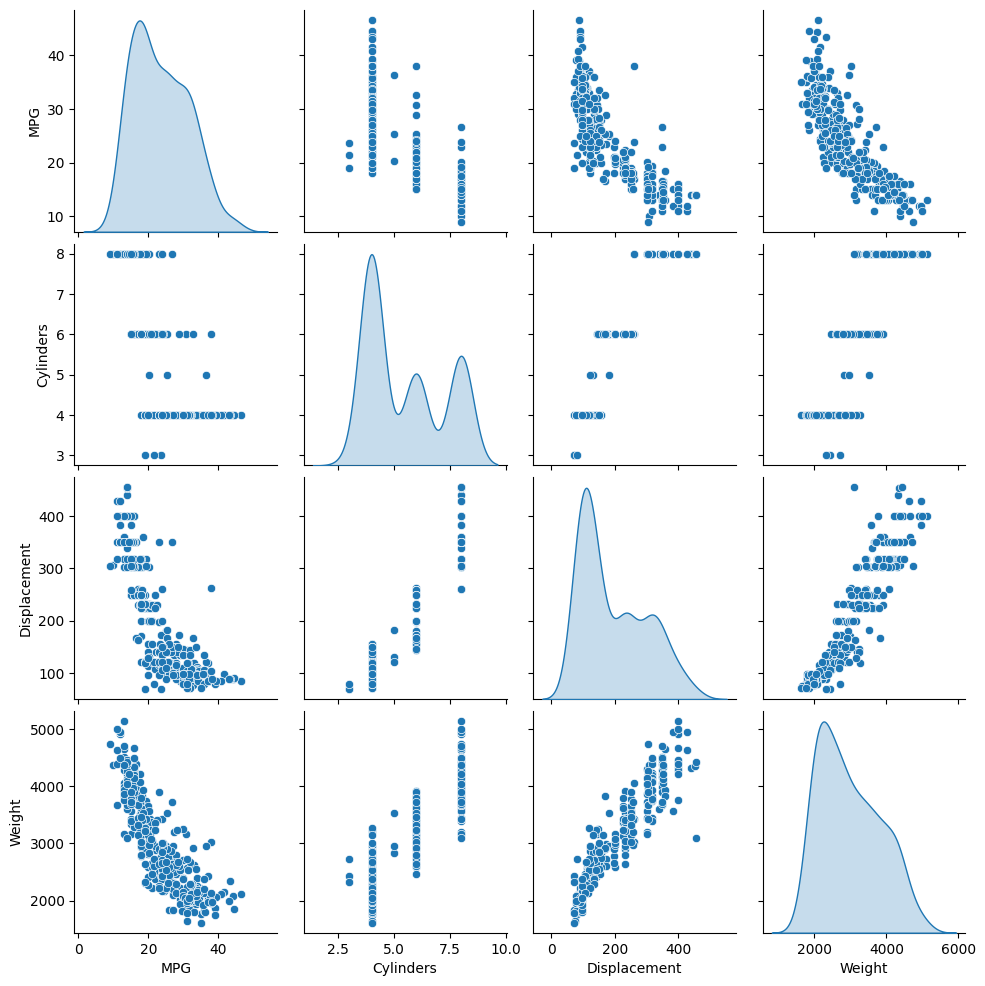

In [ ]:
g = sns.pairplot(training_set[["MPG","Cylinders", "Displacement", "Weight"]], kind='scatter', diag_kind='kde')
plt.show()

### 7 - Afficher les statistiques globales.

In [ ]:
#votre code ici

,count,mean,std,min,25%,50%,75%,max
MPG,313.00,23.60,7.96,9.00,17.00,23.00,30.00,46.60
Cylinders,313.00,5.48,1.70,3.00,4.00,4.00,8.00,8.00
Displacement,313.00,195.52,103.77,70.00,105.00,151.00,302.00,455.00
Horsepower,313.00,104.59,38.28,46.00,76.00,95.00,129.00,230.00
Weight,313.00,2986.12,841.13,1613.00,2234.00,2855.00,3645.00,5140.00
Acceleration,313.00,15.54,2.82,8.00,13.50,15.50,17.30,24.80
Model Year,313.00,76.21,3.63,70.00,73.00,76.00,79.00,82.00
Origin_Europe,313.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
Origin_Japan,313.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Origin_USA,313.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


 Dans le tableau des statistiques, il est facile de voir à quel point les plages de chaque fonctionnalité sont différentes :

In [ ]:
training_set.describe().T[["mean","std"]]

,mean,std
MPG,23.60,7.96
Cylinders,5.48,1.70
Displacement,195.52,103.77
Horsepower,104.59,38.28
Weight,2986.12,841.13
Acceleration,15.54,2.82
Model Year,76.21,3.63
Origin_Europe,0.15,0.36
Origin_Japan,0.20,0.40
Origin_USA,0.65,0.48


### 8 - Normaliser les données 

In [ ]:
from sklearn.preprocessing import StandardScaler

#votre code ici

#votre code ici


In [ ]:
training_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
260,18.60,0.30,0.28,0.14,0.75,1.12,0.49,0,0,1
184,25.00,-0.87,-0.54,-0.33,-0.49,-0.23,-0.06,0,0,1
174,18.00,0.30,-0.24,-0.20,-0.00,-0.37,-0.33,0,0,1
64,15.00,1.48,1.18,1.19,1.37,-0.73,-1.16,0,0,1
344,39.00,-0.87,-1.06,-1.06,-1.32,0.30,1.32,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,15.00,1.48,1.05,1.19,1.08,-1.08,-1.16,0,0,1
107,18.00,0.30,0.35,-0.12,-0.23,-0.19,-0.89,0,0,1
272,23.80,-0.87,-0.43,-0.51,-0.16,0.73,0.49,0,0,1
352,29.90,-0.87,-0.94,-1.04,-0.72,1.83,1.32,0,0,1


### 9 - Afficher la matrice de corrélation

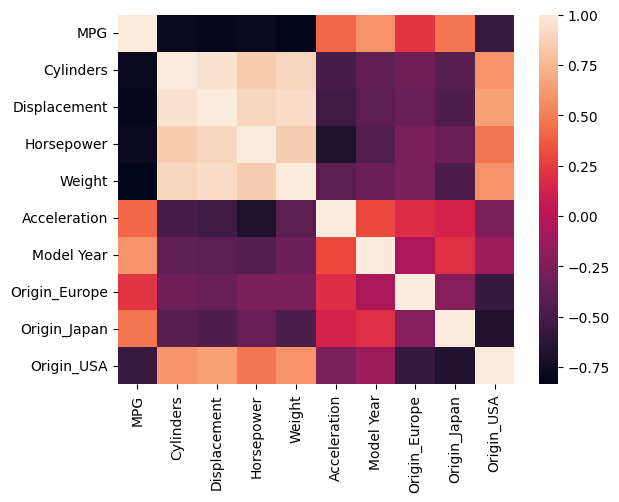

In [ ]:
#votre code ici

### 11 - Checker si on peut appliquer la régression linéaire
regarder le support de cours 3

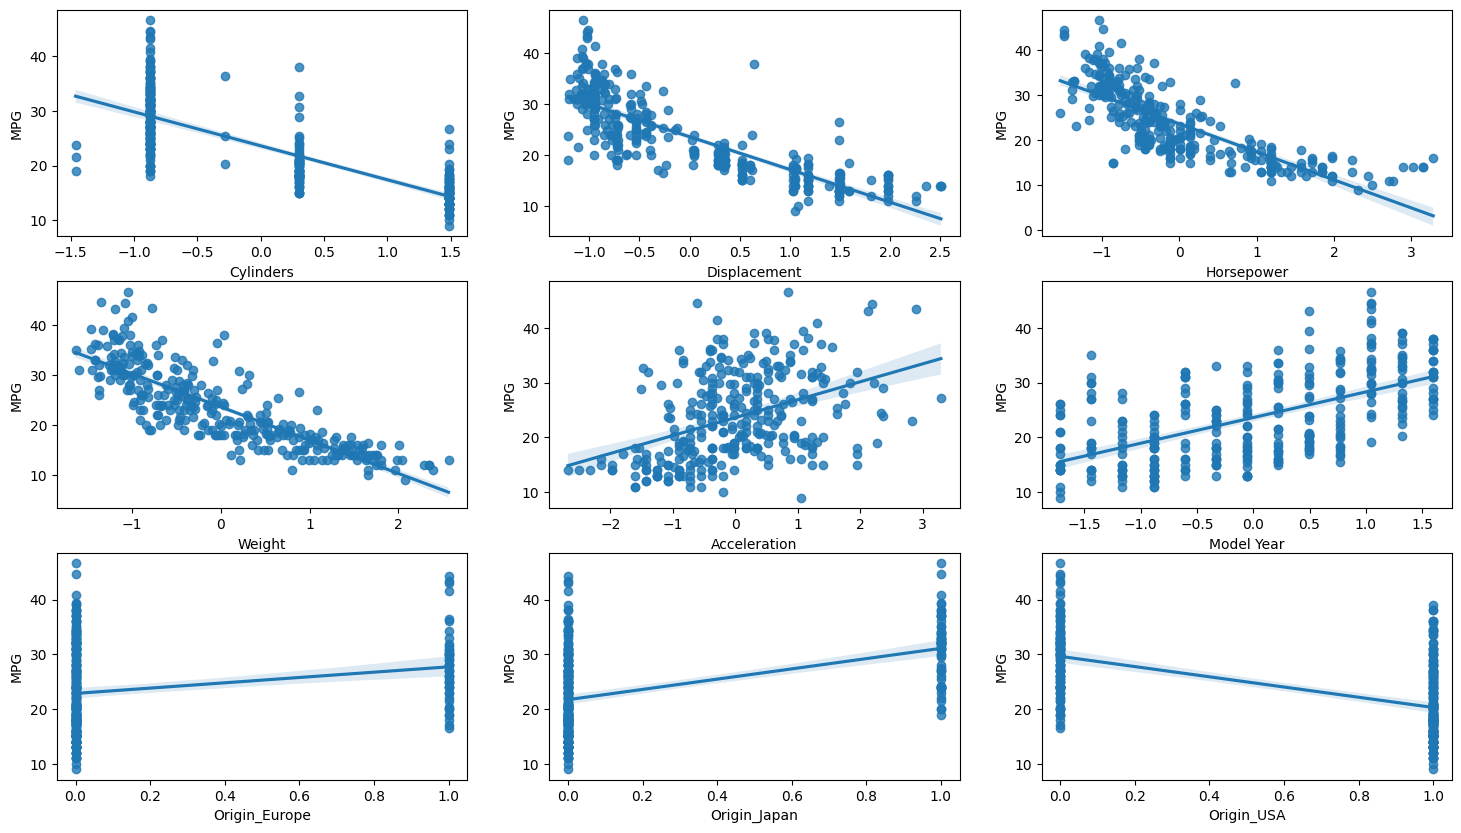

In [ ]:
#les features ne sont pas tous reliés linéairement à MPG

fig , axes = plt.subplots(3, 3, figsize=(18,10))
i = 0
j = 0
for col in training_set.drop("MPG", axis=1):
    sns.regplot(x=training_set[col], y=training_set["MPG"], ax=axes[i,j])
    #axes[i,j].set_title(col)
    
    j+=1
    if j == 3 :
        i+=1
        j=0

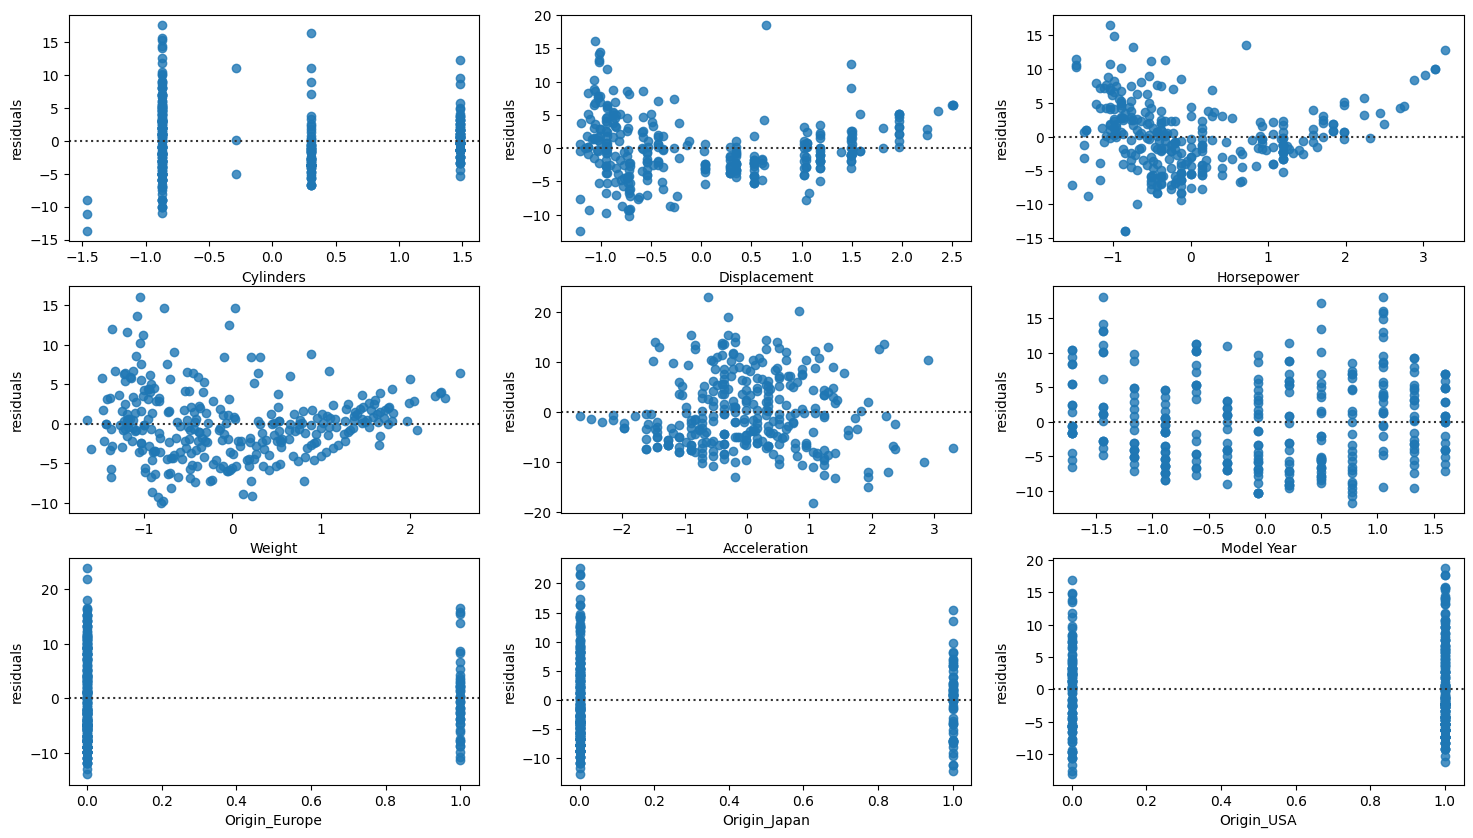

In [ ]:
#votre code ici

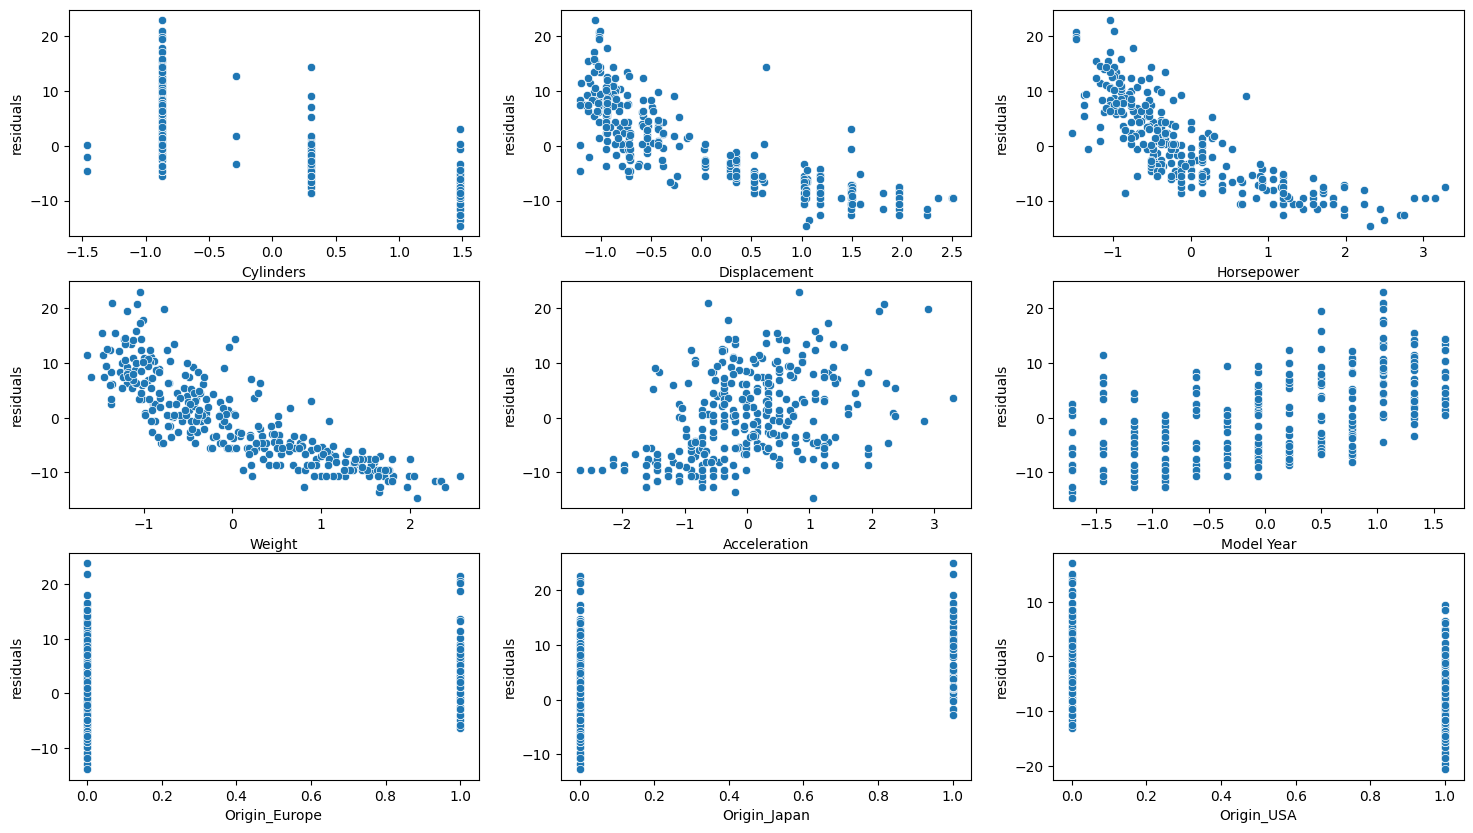

In [ ]:
#votre code ici

/tmp/ipykernel_8415/3043935754.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm, ax=axes[i,j])
/tmp/ipykernel_8415/3043935754.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm, ax=axes[i,j])
/tmp/ipykernel_8415/3043935754.py:11: UserWarn

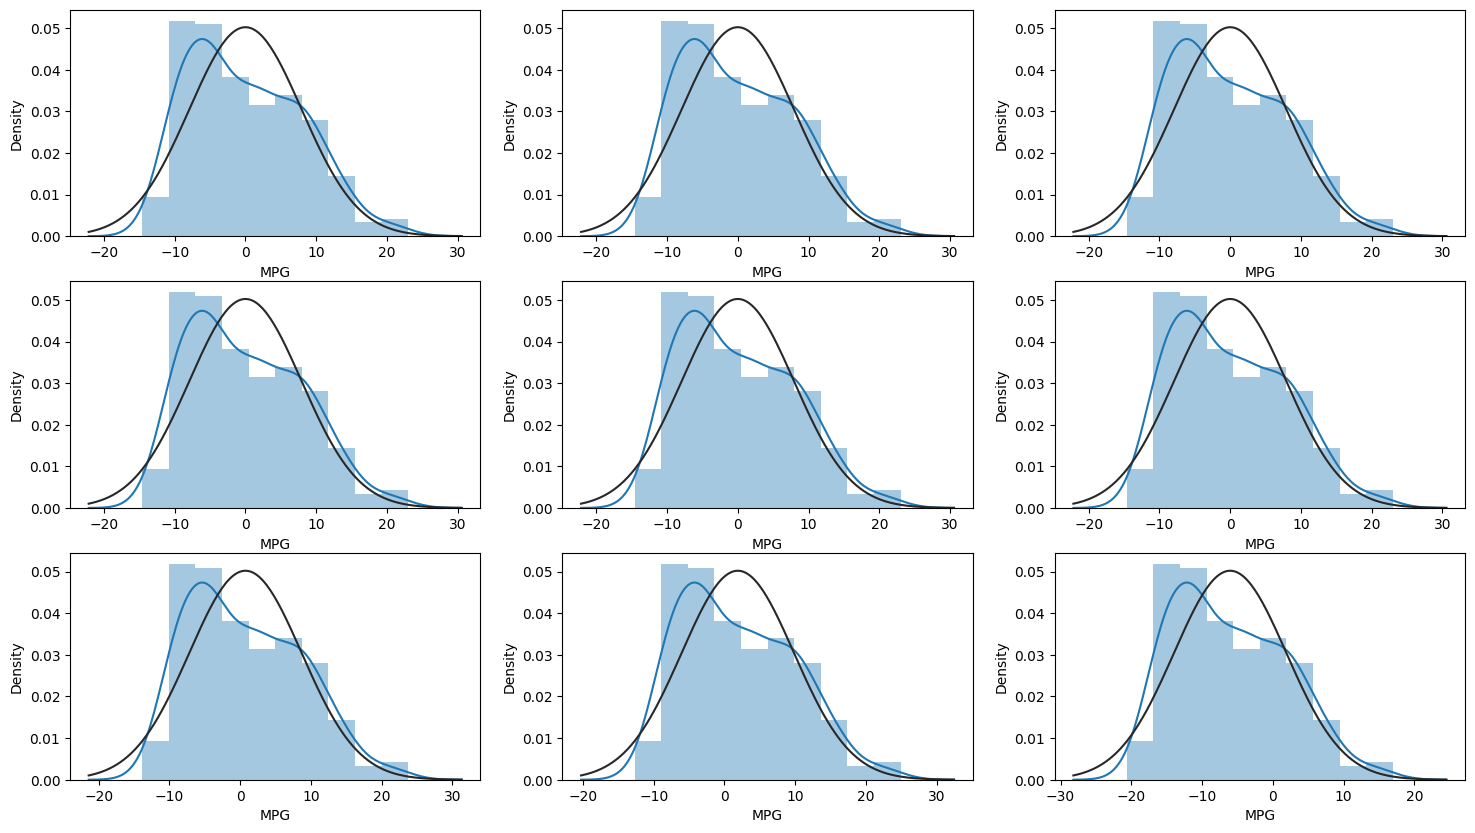

In [ ]:
#check for normality

from scipy import stats
import matplotlib.pyplot as plt

fig , axes = plt.subplots(3, 3, figsize=(18,10))
i = 0
j = 0
for col in training_set.drop("MPG", axis=1):
    residuals = training_set["MPG"] - stats.linregress(training_set[col], training_set["MPG"])[1]
    sns.distplot(residuals, fit=stats.norm, ax=axes[i,j])
    
    #axes[i,j].set_ylabel("residuals")
    
    j+=1
    if j == 3 :
        i+=1
        j=0

### 12 - Entraînez le modèle

In [ ]:
from sklearn.linear_model import LinearRegression
#votre code ici

LinearRegression()

In [ ]:
#print coefficient

#votre code ici
#print intercept

#votre code ici

Coeff:  [-0.58079485  1.98975015 -0.82638498 -5.39369235  0.11871844  2.88917838
  0.84834323  1.17881301 -2.02715623]
Intercept: 24.540255159913478


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred_train = clf.predict(training_set.drop("MPG", axis=1))

print(mean_absolute_error(training_set["MPG"], y_pred_train))
print(mean_squared_error(training_set["MPG"], y_pred_train))

2.5445826417298005
10.809834360243096


### 11 - Afficher l'erreur

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Votre code ici

2.4619996980661494
10.602279011688374
